# Map examples of shallow, extended, or sub-surface events


This code plots parts of figure 1 in the related article

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
import cmocean
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
# Set up plot folders and paths
base_path_bathy = '../../BATHY/'
Name_platform = 'SST_ESA_spatial'
plot_folder = '../PLOTS_2022/mhw_stats_' + Name_platform + '/'

# Import bathymetry data

In [3]:
# Load coastine
coast=np.loadtxt(base_path_bathy + "eaccoast.dat")
File_bathy = Dataset(base_path_bathy + 'bathy_dbdb2_v30.nc')
latBathy = File_bathy.variables['lat'][:]       
lonBathy = File_bathy.variables['lon'][:]       
heightBathy = File_bathy.variables['height'][:]     


# Import SST data

<xarray.Dataset>
Dimensions:                (time: 10227, lat: 81, lon: 81)
Coordinates:
  * time                   (time) datetime64[ns] 1991-01-01T12:00:00 ... 2018...
  * lat                    (lat) float32 -36.03 -35.97 -35.92 ... -32.08 -32.03
  * lon                    (lon) float32 150.0 150.0 150.1 ... 153.9 153.9 154.0
    month_day              (time) object '0101' '0102' '0103' ... '1230' '1231'
Data variables:
    analysed_sst           (time, lat, lon) float32 nan nan ... -0.31 -0.3807
    analysed_sst_degreesC  (time, lat, lon) float32 nan nan ... -0.31 -0.3807

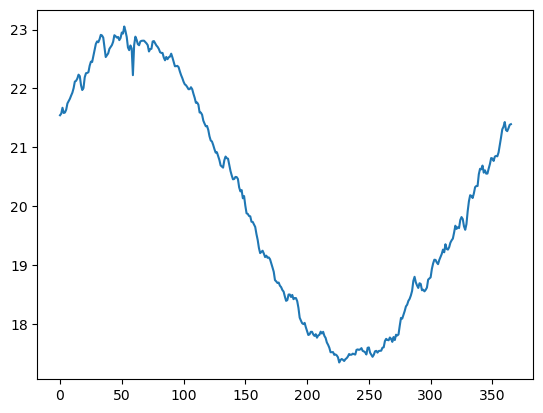

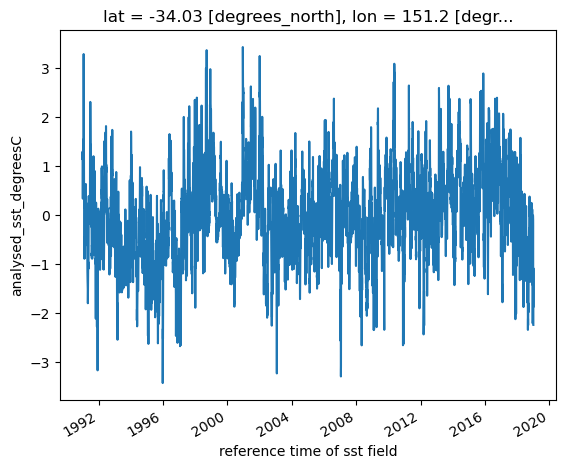

In [5]:
# Get SST
file_sst = r'../../SATELLITE/DATA/GLO-SST-L4-REP-OBS-SST_1600741056485_1992_2017.nc'

ds_SST = xr.open_dataset(file_sst)
ds_SST['analysed_sst_degreesC'] = ds_SST['analysed_sst']  - 273.15  # Celcius
ds_SST

# Create daily climatology
da = ds_SST.assign_coords(month_day=ds_SST.time.dt.strftime("%m%d"))
clim_DOY = da.groupby("month_day").mean("time") # create daily climatology!!!
# Check
plt.figure()
plt.plot(clim_DOY.sel(lat=-34.025, lon=151.225).analysed_sst_degreesC.values)

# Get anomalies from the daily climatology
ano_DOY = da.groupby("month_day") - clim_DOY
# Check
plt.figure()
ano_DOY.sel(lat=-34.025, lon=151.225).analysed_sst_degreesC.plot()
ano_DOY

# Import SSH data

<xarray.Dataset>
Dimensions:    (TIME: 6199, LONGITUDE: 21, LATITUDE: 21)
Coordinates:
  * TIME       (TIME) datetime64[ns] 1993-01-01 1993-01-03 ... 2019-01-01
  * LONGITUDE  (LONGITUDE) float32 150.0 150.2 150.4 150.6 ... 153.6 153.8 154.0
  * LATITUDE   (LATITUDE) float32 -36.0 -35.8 -35.6 -35.4 ... -32.4 -32.2 -32.0
    month_day  (TIME) object '0101' '0103' '0105' ... '1230' '1231' '0101'
Data variables:
    GSLA       (TIME, LATITUDE, LONGITUDE) float64 nan -0.086 ... 0.03609
    GSL        (TIME, LATITUDE, LONGITUDE) float64 -0.08293 -0.08599 ... 0.03603
    UCUR       (TIME, LATITUDE, LONGITUDE) float64 nan 0.001712 ... -0.08817
    VCUR       (TIME, LATITUDE, LONGITUDE) float64 nan 0.04607 ... 0.1271 0.1245

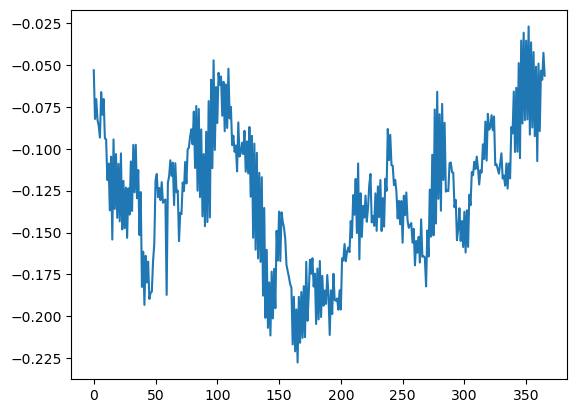

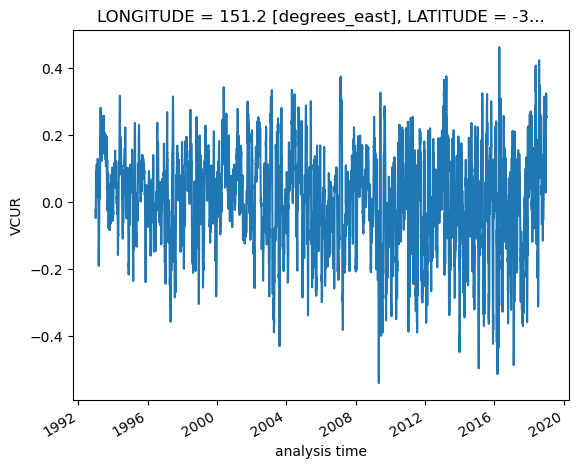

In [6]:
# Get SSH
file_ssh = r'../../SATELLITE/DATA/IMOS_aggregation_1992_2019_SYDregion.nc'
ds_SSH = xr.open_dataset(file_ssh)
ds_SSH

# Get anomalies from the daily climatology for SSH
da = ds_SSH.assign_coords(month_day=ds_SSH.TIME.dt.strftime("%m%d"))

clim_DOY_SSH = da.groupby("month_day").mean("TIME") # create daily climatology!!!
# Check
plt.figure()
plt.plot(clim_DOY_SSH.sel(LATITUDE=-34.025, LONGITUDE=151.225, method="nearest").VCUR.values)

# get anomalies from it
ano_DOY_SSH = da.groupby("month_day") - clim_DOY_SSH
# Check
plt.figure()
ano_DOY_SSH.sel(LATITUDE=-34.025, LONGITUDE=151.225, method="nearest").VCUR.plot()
ano_DOY_SSH

# Figure for a specific day

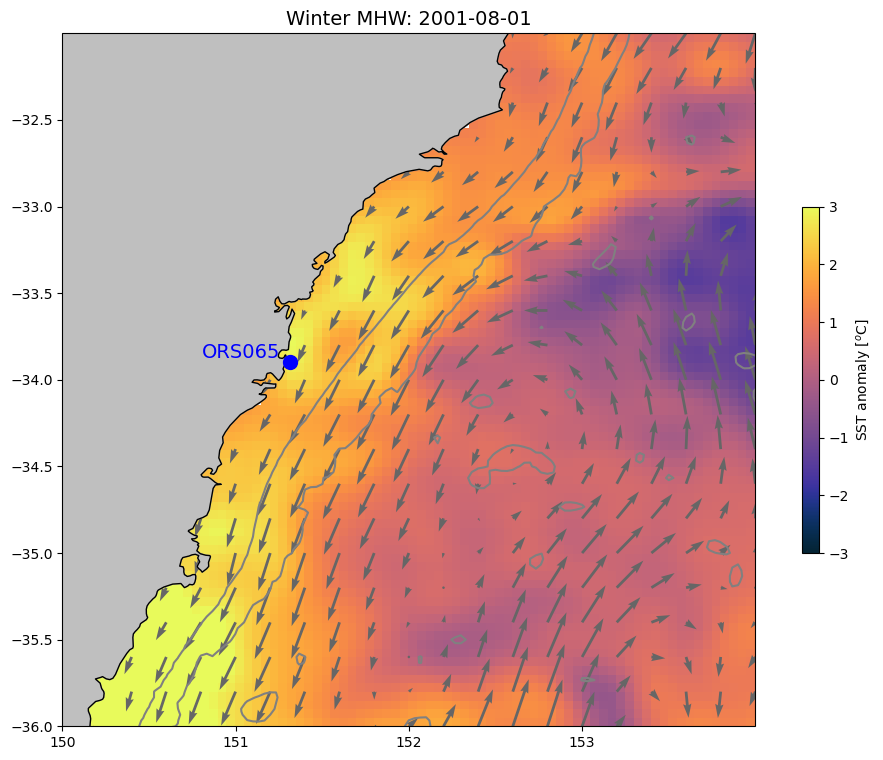

In [9]:
# Plot for a specific day
title_MHW = 'Winter MHW'
clim0 = (-3, 3)
ds_SST_time1 = ano_DOY.sel(time="2001-08-01 12:00:00", method="nearest")
ds_SSH_time1 = ds_SSH.sel(TIME="2001-08-01 12:00:00", method="nearest")

# Set limits for the plot
xlim1 = 154
xlim0 = 150
ylim0 = -36
ylim1 = -32

# Create the figure
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw=dict(projection=ccrs.PlateCarree()))
scale = '10m'
cmap = cmocean.cm.thermal

# Add bathymetry contours
Q_bathy = ax.contour(lonBathy, latBathy, heightBathy, levels=[-5000, -2000, -200], colors='grey', linestyles='solid')

# Plot SST
Q = ax.pcolor(ds_SST_time1.lon, ds_SST_time1.lat, ds_SST_time1.analysed_sst_degreesC, cmap=cmap, vmin=clim0[0], vmax=clim0[1])
Q2 = ax.quiver(ds_SSH_time1.LONGITUDE, ds_SSH_time1.LATITUDE, ds_SSH_time1.UCUR, ds_SSH_time1.VCUR, units='width', scale=10, width=0.004, headwidth=3, color=(0.4, 0.4, 0.4))

# Set extent and add features
ax.set_extent([xlim0, xlim1, ylim0, ylim1])
land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face', facecolor=cfeature.COLORS['land'])
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale)
ax.set_xticks(np.arange(xlim0, xlim1, 1), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(ylim0, ylim1, 0.5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

# Add colorbar and title
cb = plt.colorbar(Q, ax=ax, shrink=0.5)
cb.set_label('SST anomaly [$^o$C]', size=10)
ax.set_title(title_MHW + ': ' + str(ds_SST_time1.time.values)[0:10], fontsize=14)

# Add annotations
lon_ORS, lat_ORS = 151.315, -33.898
ax.plot([lon_ORS], [lat_ORS], 'bo', markersize=10)
ax.annotate('ORS065', color='b', xy=(lon_ORS, lat_ORS), xycoords='data', xytext=(-10, 0), textcoords='offset pixels', fontsize=14, horizontalalignment='right', verticalalignment='bottom')

# Save and display the plot
plt.savefig(plot_folder + 'plot_SST_SSH_' + title_MHW + str(ds_SST_time1.time.values)[0:13] + 'AUS.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.show()

# Figure with multiple maps

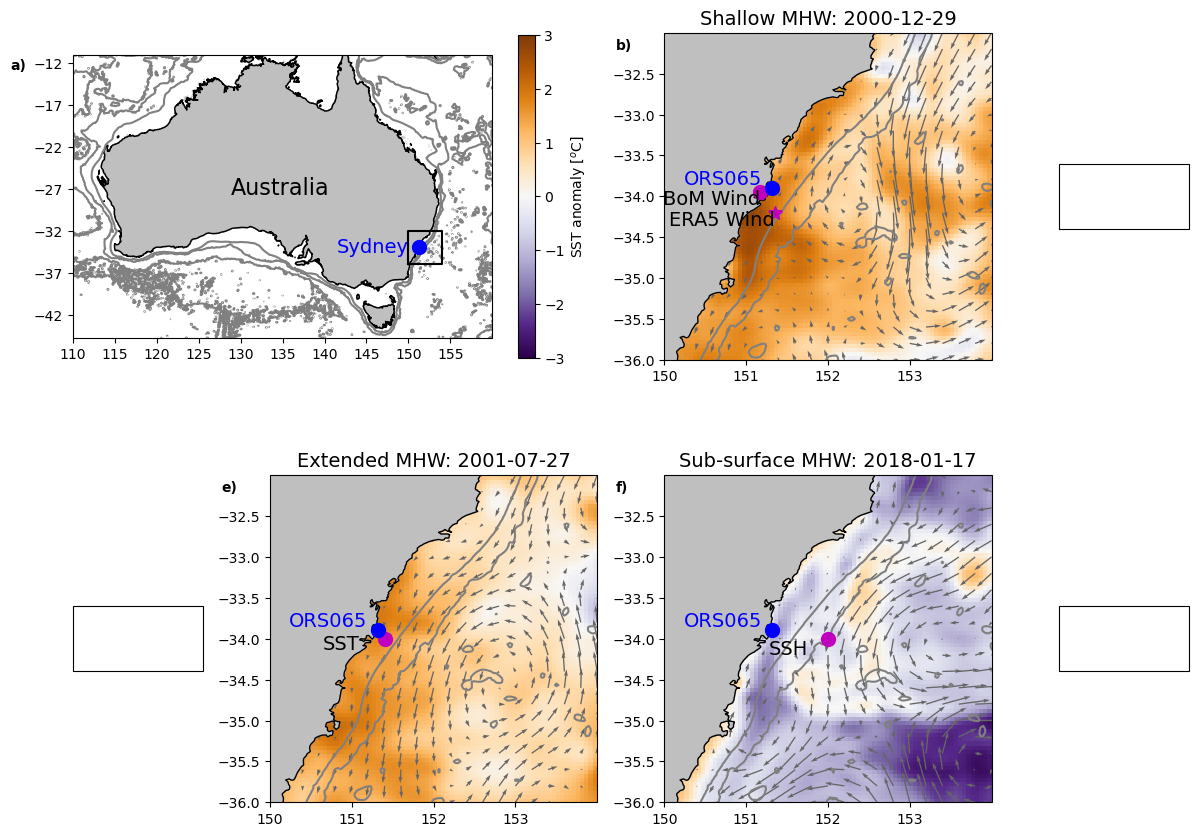

In [8]:
#### ARCTICLE figure 1 maps

# Data
ds_SST_time_ave = ano_DOY.mean("time")
title_MHW1 = 'Shallow MHW' # Summer
ds_SST_time1 = ano_DOY.sel(time="2000-12-29 12:00:00", method="nearest")
ds_SSH_time1 = ds_SSH.sel(TIME="2000-12-29 12:00:00", method="nearest")
title_MHW2 = 'Extended MHW' # Winter
ds_SST_time2 = ano_DOY.sel(time="2001-07-27 12:00:00", method="nearest")
ds_SSH_time2 = ds_SSH.sel(TIME="2001-07-27 12:00:00", method="nearest")
title_MHW3 = 'Sub-surface MHW' # Summer
ds_SST_time3 = ano_DOY.sel(time="2018-01-17 12:00:00", method="nearest")
ds_SSH_time3 = ds_SSH.sel(TIME="2018-01-17 12:00:00", method="nearest")

# Set limits for the plot
xlim1=154 ; xlim0=150; ylim0=-36;ylim1=-32
xlim0big=110 ; xlim1big=160; ylim0big=-42;ylim1big=-11
clim0 = (-3, 3)
cmap = 'PuOr_r';
cmap_T = cmocean.cm.thermal;
scale = '10m'    
lon_SYD_airport, lat_SYD_airport = 151.1731, -33.9465
lon_ORS, lat_ORS = 151.315, -33.898 #Latitude:-33.898, Longitude:151.315.
lon_ERA, lat_ERA = 151.35, -34.2
lon_SST, lat_SST = 151.4, -34
lon_GEO, lat_GEO = 152, -34
lon_SYD, lat_SYD = 151.2093, -33.8688
#lon_SYD, lat_SYD = 151.2093, -33.8688


# Create the figure
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(12, 9), subplot_kw=dict(projection=ccrs.PlateCarree()),facecolor='white')
gs = axs[1, 2].get_gridspec()

# Panel a)
for ax in axs[0,0:3]:
    ax.remove()
ax = fig.add_subplot(gs[0, 0:3], projection=ccrs.PlateCarree())

# Add bathymetry contours
Q_bathy = ax.contour(lonBathy, latBathy, heightBathy, levels = [-5000, -2000, -200], colors = 'grey', linestyles='solid')
ax.set_extent([xlim0big, xlim1big, ylim0big, ylim1big])
# Plot SST
Q = ax.pcolor(ds_SST_time_ave.lon, ds_SST_time_ave.lat,ds_SST_time_ave.analysed_sst_degreesC, cmap=cmap,vmin=clim0[0], vmax=clim0[1])
land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
# Set extent and add features
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale)
ax.set_xticks(np.arange(xlim0big, xlim1big, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(ylim0big, ylim1big, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
xs = [xlim0, xlim1, xlim1, xlim0,xlim0]
ys = [ylim0, ylim0, ylim1, ylim1,ylim0]
ax.plot(xs, ys, color="black")    
# Add colorbar and title
cb = plt.colorbar(Q,ax=ax,shrink=0.8)
cb.set_label('SST anomaly [$^o$C]', size=10)
# Add symbols
ax.plot([lon_SYD], [lat_SYD],'bo',markersize=10)
plt.annotate('Sydney', color='blue', xy=(lon_SYD, lat_SYD), xycoords='data', xytext=(-10, -10), textcoords='offset pixels',fontsize=14,
            horizontalalignment='right', verticalalignment='bottom')
plt.annotate('Australia', xy=(130, -27), xycoords='data', xytext=(-10, -10), textcoords='offset pixels',fontsize=16, 
             horizontalalignment='left', verticalalignment='bottom')
ax.annotate("a)", xy=(-0.15, 0.95), xycoords="axes fraction", fontweight="bold")


# Panel b)
for ax in axs[0,3:5]:
    ax.remove()
ax = fig.add_subplot(gs[0, 3:5], projection=ccrs.PlateCarree())

# Add bathymetry contours
Q_bathy = ax.contour(lonBathy, latBathy, heightBathy, levels = [-5000, -2000, -200], colors = 'grey', linestyles='solid')
# Plot SST
Q = ax.pcolor(ds_SST_time1.lon, ds_SST_time1.lat,ds_SST_time1.analysed_sst_degreesC, cmap=cmap,vmin=clim0[0], vmax=clim0[1])
# Plot vectors SSH
Q2 = ax.quiver(ds_SSH_time1.LONGITUDE,ds_SSH_time1.LATITUDE,ds_SSH_time1.UCUR,ds_SSH_time1.VCUR, units='width',scale = 10, width=0.004, headwidth =3,color = (0.4, 0.4, 0.4)) # color = 'tab:gray'
# Set extent and add features
ax.set_extent([xlim0, xlim1, ylim0, ylim1])
land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale)
ax.set_xticks(np.arange(xlim0, xlim1, 1), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(ylim0, ylim1, 0.5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
# Add  title
ax.set_title(title_MHW1 + ': ' + str(ds_SST_time1.time.values)[0:10],fontsize=14)    
# Add symbols
ax.plot([lon_SYD_airport], [lat_SYD_airport],'mo',markersize=10)
ax.annotate('BoM Wind',
            xy=(lon_SYD_airport, lat_SYD_airport), xycoords='data',
            xytext=(0, -17), textcoords='offset pixels',fontsize=14,
            horizontalalignment='right',
            verticalalignment='bottom')
ax.plot([lon_ERA], [lat_ERA],'m*',markersize=10)
ax.annotate('ERA5 Wind',
            xy=(lon_ERA, lat_ERA), xycoords='data',
            xytext=(0, -17), textcoords='offset pixels',fontsize=14,
            horizontalalignment='right',
            verticalalignment='bottom')

ax.plot([lon_ORS], [lat_ORS],'bo',markersize=10)
ax.annotate('ORS065',color='b',
            xy=(lon_ORS, lat_ORS), xycoords='data',
            xytext=(-10, 0), textcoords='offset pixels',fontsize=14,
            horizontalalignment='right',
            verticalalignment='bottom')
ax.annotate("b)", xy=(-0.15, 0.95), xycoords="axes fraction", fontweight="bold")


# Panel c)
#ax = axs[1,4]


# Panel d)
for ax in axs[1,1:3]:
    ax.remove() 
ax = fig.add_subplot(gs[1, 1:3], projection=ccrs.PlateCarree())

# Add bathymetry contours
Q_bathy = ax.contour(lonBathy, latBathy, heightBathy, levels = [-5000, -2000, -200], colors = 'grey', linestyles='solid')
# Plot SST
Q = ax.pcolor(ds_SST_time2.lon, ds_SST_time2.lat,ds_SST_time2.analysed_sst_degreesC, cmap=cmap,vmin=clim0[0], vmax=clim0[1])
# Plot vectors SSH
Q2 = ax.quiver(ds_SSH_time2.LONGITUDE,ds_SSH_time2.LATITUDE,ds_SSH_time2.UCUR,ds_SSH_time2.VCUR, units='width',scale = 10, width=0.004, headwidth =3,color = (0.4, 0.4, 0.4)) # color = 'tab:gray'
# Set extent and add features
ax.set_extent([xlim0, xlim1, ylim0, ylim1])
land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale)
ax.set_xticks(np.arange(xlim0, xlim1, 1), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(ylim0, ylim1, 0.5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
# Add  title
ax.set_title(title_MHW2 + ': ' + str(ds_SST_time2.time.values)[0:10],fontsize=14)    
# Add symbols
ax.plot([lon_SST], [lat_SST],'mo',markersize=10)
ax.annotate('SST',
            xy=(lon_SST, lat_SST), xycoords='data',
            xytext=(-25, -15), textcoords='offset pixels',fontsize=14,
            horizontalalignment='right',
            verticalalignment='bottom')
ax.plot([lon_ORS], [lat_ORS],'bo',markersize=10)
ax.annotate('ORS065',color='b',
            xy=(lon_ORS, lat_ORS), xycoords='data',
            xytext=(-10, 0), textcoords='offset pixels',fontsize=14,
            horizontalalignment='right',
            verticalalignment='bottom')
ax.annotate("e)", xy=(-0.15, 0.95), xycoords="axes fraction", fontweight="bold")


# Panel f)
for ax in axs[1,3:5]:
    ax.remove()
ax = fig.add_subplot(gs[1, 3:5], projection=ccrs.PlateCarree())

# Add bathymetry contours
Q_bathy = ax.contour(lonBathy, latBathy, heightBathy, levels = [-5000, -2000, -200], colors = 'grey', linestyles='solid')
# Plot SST
Q = ax.pcolor(ds_SST_time3.lon, ds_SST_time3.lat,ds_SST_time3.analysed_sst_degreesC, cmap=cmap,vmin=clim0[0], vmax=clim0[1])
# Plot vectors SSH
Q2 = ax.quiver(ds_SSH_time3.LONGITUDE,ds_SSH_time3.LATITUDE,ds_SSH_time3.UCUR,ds_SSH_time3.VCUR, units='width',scale = 10, width=0.004, headwidth =3,color = (0.4, 0.4, 0.4)) # color = 'tab:gray'
# Set extent and add features
ax.set_extent([xlim0, xlim1, ylim0, ylim1])
land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(land, facecolor='0.75')
ax.coastlines(scale)
ax.set_xticks(np.arange(xlim0, xlim1, 1), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(ylim0, ylim1, 0.5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()           
# Add  title
ax.set_title(title_MHW3 + ': ' + str(ds_SST_time3.time.values)[0:10],fontsize=14)    
# Add symbols
ax.plot([lon_GEO], [lat_GEO],'mo',markersize=10)
ax.annotate('SSH',
            xy=(lon_GEO, lat_GEO), xycoords='data',
            xytext=(-20, -20), textcoords='offset pixels',fontsize=14,
            horizontalalignment='right',
            verticalalignment='bottom')
ax.plot([lon_ORS], [lat_ORS],'bo',markersize=10)
ax.annotate('ORS065',color='b',
            xy=(lon_ORS, lat_ORS), xycoords='data',
            xytext=(-10, 0), textcoords='offset pixels',fontsize=14,
            horizontalalignment='right',
            verticalalignment='bottom')
ax.annotate("f)", xy=(-0.15, 0.95), xycoords="axes fraction", fontweight="bold")


# Save
fig.tight_layout()
plt.savefig(plot_folder + 'plot_SST_SSH_subplots_article.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.savefig(plot_folder + 'plot_SST_SSH_subplots_article.pdf')  
plt.show()

